<a href="https://colab.research.google.com/github/442203479/SE-proj/blob/master/AlzheimerPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
# @title Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import shapiro
import matplotlib.pyplot as plt
from scipy.stats import zscore
import scipy.stats as stats
!pip install mrmr_selection
from mrmr import mrmr_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
import warnings
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.impute import SimpleImputer
!pip install pymrmr
from pymrmr import mRMR
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import joblib

warnings.filterwarnings('ignore')


In [101]:
# @title Reading and Copying the Dataset
# Read the dataset
dataset = pd.read_csv("alzheimer.csv")
# Copy the dataset
dataframe = dataset.copy() # to keep the original dataset unchanged

There are 10 features, they are as follows:
1.  Group is the Class lable
2.  M/F the gender of the patients
3.  Age is the Age of the patient
4.  EDUC are Years of Education
5.  SES are Socioeconomic Status on a scale from 1 to 5
6.  MMSE is Mini Mental State Examination
7.  CDR is Clinical Dementia Rating
8.  eTIV is Estimated total intracranial volume
9.  nWBV is Normalize Whole Brain Volume
10.  ASF is Atlas Scaling Factor







In [102]:
# @title Check the Data Shape
dataframe.shape

(373, 10)

In [103]:
# @title Display the First 5 Rows
dataframe.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [104]:
# @title Describe the Numeric Values in the Dataset
dataframe.describe()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


# Visualization

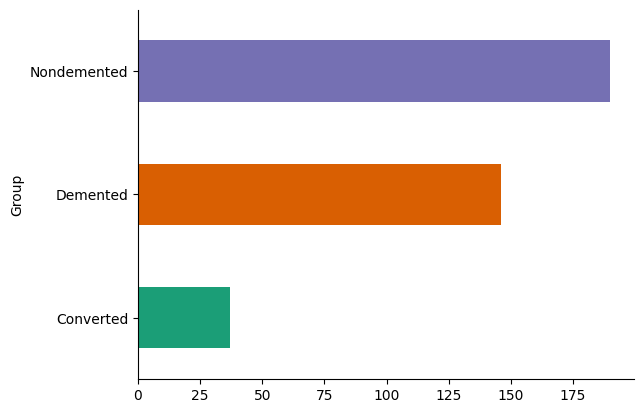

In [105]:
# @title Group

dataframe.groupby('Group').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

we have three categories:
1. Demented:
which is a lable given to patients with Alzhiemer
2. Nondemented:
which is a lable given to patients without Alzhiemer
3. Converted:
which is a lable given to patients diagnosed first to not have Alzhiemer but were converted to be patients with Alzhiemer

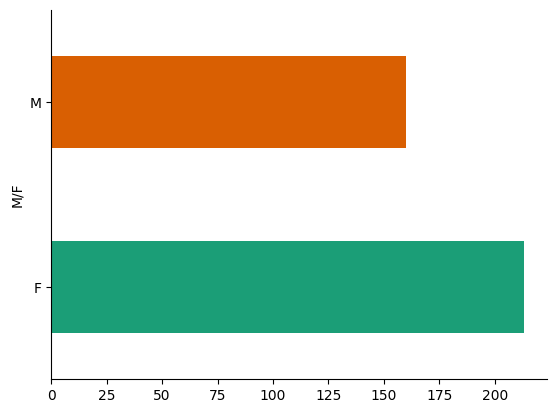

In [106]:
# @title M/F

dataframe.groupby('M/F').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

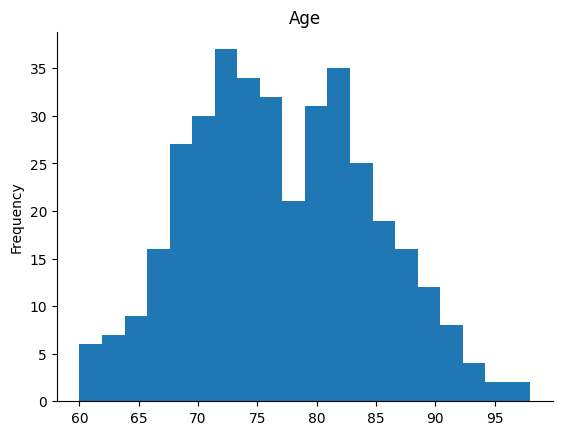

In [107]:
# @title Age

dataframe['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

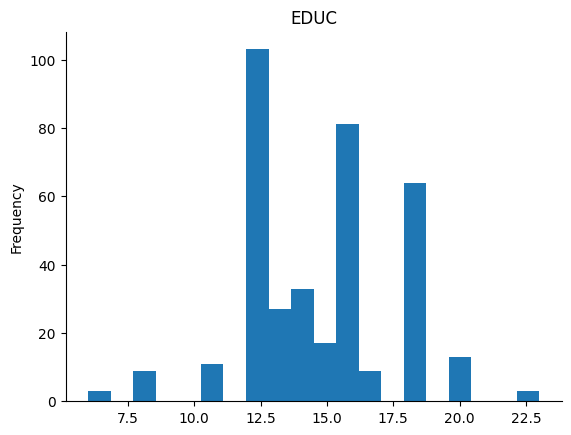

In [108]:
# @title EDUC

dataframe['EDUC'].plot(kind='hist', bins=20, title='EDUC')
plt.gca().spines[['top', 'right',]].set_visible(False)

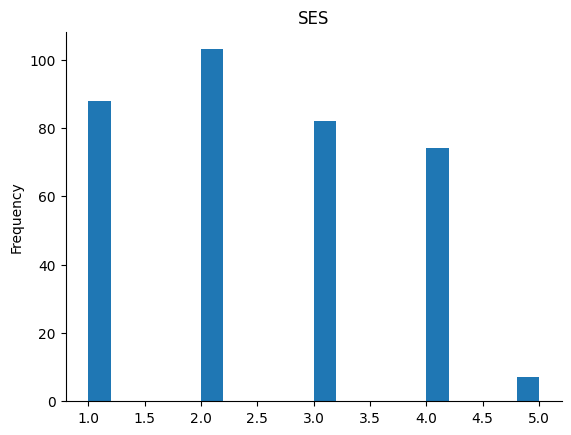

In [109]:
# @title SES

dataframe['SES'].plot(kind='hist', bins=20, title='SES')
plt.gca().spines[['top', 'right',]].set_visible(False)

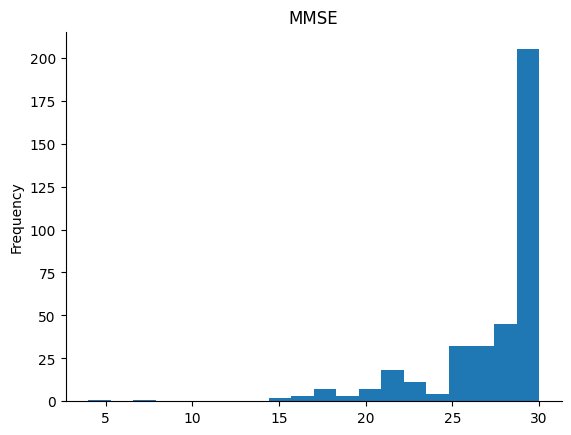

In [110]:
# @title MMSE

dataframe['MMSE'].plot(kind='hist', bins=20, title='MMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

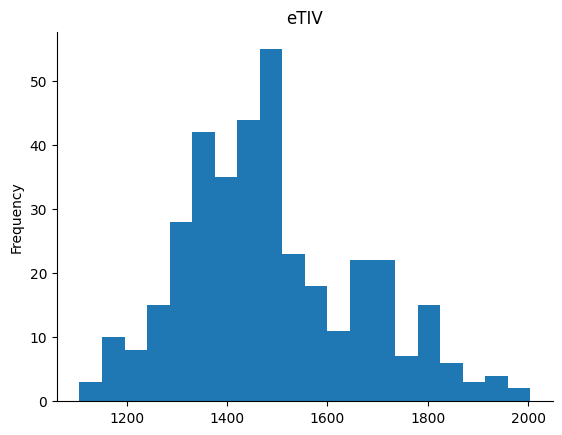

In [111]:
# @title eTIV

dataframe['eTIV'].plot(kind='hist', bins=20, title='eTIV')
plt.gca().spines[['top', 'right',]].set_visible(False)

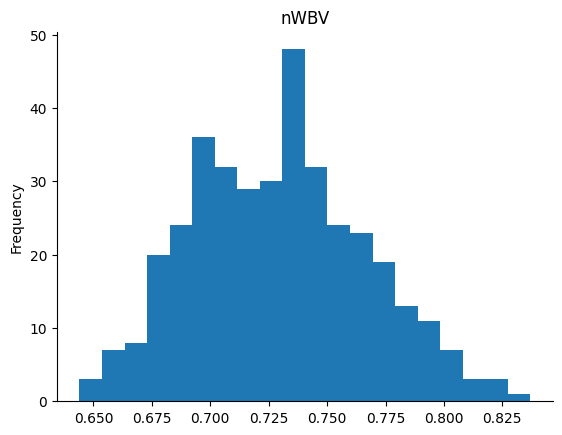

In [112]:
# @title nWBV

dataframe['nWBV'].plot(kind='hist', bins=20, title='nWBV')
plt.gca().spines[['top', 'right',]].set_visible(False)

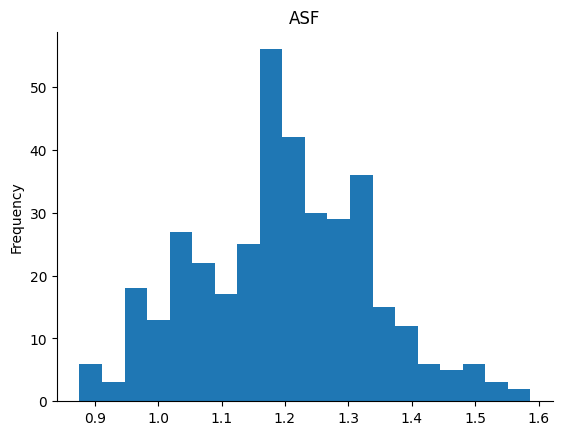

In [113]:
# @title ASF

dataframe['ASF'].plot(kind='hist', bins=20, title='ASF')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Changing The converted records to be demented

In [114]:
for index, row in dataframe.iterrows():
  if row['Group'] == 'Converted':
    dataframe.at[index, 'Group'] = 'Demented'

conuter = dataframe['Group'].value_counts()
print(conuter)

counter = dataframe['M/F'].value_counts()
print(counter)

Group
Nondemented    190
Demented       183
Name: count, dtype: int64
M/F
F    213
M    160
Name: count, dtype: int64


# Data Cleaning


# Encoding

Encoding the M/F attribute to be 0 for M (male) and 1 for F (female) and the Group attribute to be 0 for Demented and 1 for Nondemented

In [115]:
Columns = ["Group","M/F"]
encode = LabelEncoder()
for i in Columns:
    dataframe[i] = encode.fit_transform(dataframe[i])
    # Reverse the encoding
    dataframe[i] = 1 - dataframe[i]
    print(dataframe[i].value_counts())
    print("------------------------")

Group
0    190
1    183
Name: count, dtype: int64
------------------------
M/F
1    213
0    160
Name: count, dtype: int64
------------------------


## Handeling Missing Values

In [116]:
# @title Check if Any Column has Null values in the Dataset
dataframe.isnull().any()

Group    False
M/F      False
Age      False
EDUC     False
SES       True
MMSE      True
CDR      False
eTIV     False
nWBV     False
ASF      False
dtype: bool

As displayed, the SES and MMSE columns contain missing values. First, we'll check whether or not the data for these columns is normally distrubuted using the Shapiro-Wilk test.

In [117]:
stat, p_value = shapiro(dataframe['SES'])

print('Shapiro-Wilk test for SES:')
if p_value < 0.05:
    print("The data is not normally distributed.")
else:
    print("The data appears to be normally distributed.")

stat, p_value = shapiro(dataframe['MMSE'])

print('Shapiro-Wilk test for MMSE:')
if p_value < 0.05:
    print("The data is not normally distributed.")
else:
    print("The data appears to be normally distributed.")


## Since the data in both columns is normally distributed, we can either perform median or mean imputation.
dataframe['SES'].fillna(dataframe['SES'].mean(), inplace=True)
dataframe['MMSE'].fillna(dataframe['MMSE'].mean(), inplace=True)


Shapiro-Wilk test for SES:
The data appears to be normally distributed.
Shapiro-Wilk test for MMSE:
The data appears to be normally distributed.


In [118]:
## Since the data in both columns is normally distributed, we can either perform median or mean imputation.
dataframe['SES'].fillna(dataframe['SES'].mean(), inplace=True)
dataframe['MMSE'].fillna(dataframe['MMSE'].mean(), inplace=True)

## Check for missing values again
dataframe.isnull().sum()

Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

## Outlier Detection

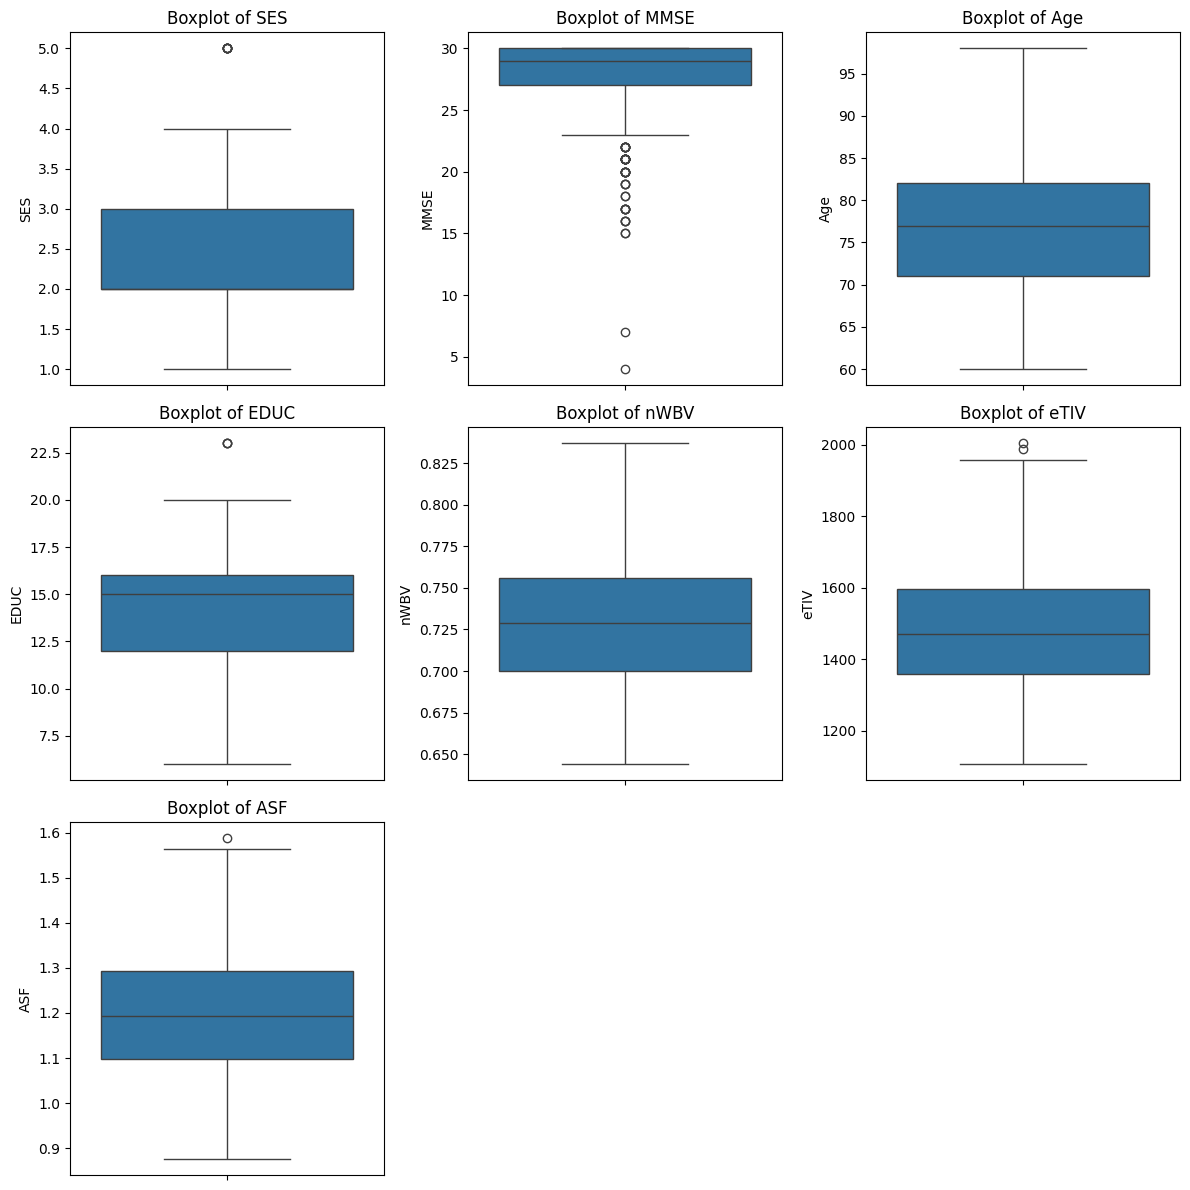

In [119]:
numeric_features = ['SES', 'MMSE', 'Age', 'EDUC', 'nWBV', 'eTIV', 'ASF']
std_dev=3

plt.figure(figsize=(12, 12))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(dataframe[feature])
    plt.title(f'Boxplot of {feature}')


# Adjust layout to prevent overlapping of subplots
plt.tight_layout()




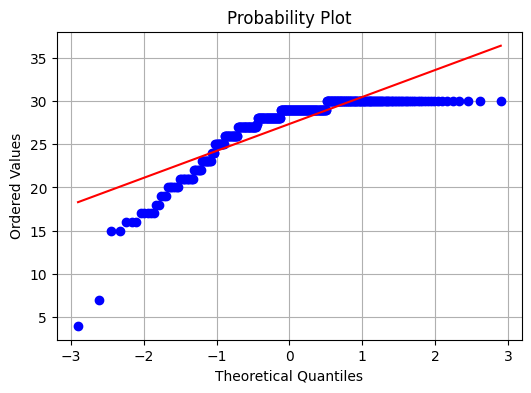

In [120]:
# Create a probability plot
plt.figure(figsize=(6, 4))
res = stats.probplot(dataframe['MMSE'], plot=plt)

# Visual inspection
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.title('Probability Plot')
plt.grid(True)
plt.show()

The maximum score for the MMSE is 30. A score of 25 or higher is classed as normal. If the score is below 24, the result is usually considered to be abnormal, indicating possible cognitive impairment

# Exploratory Dataset Analysis



##Univariate Analysis

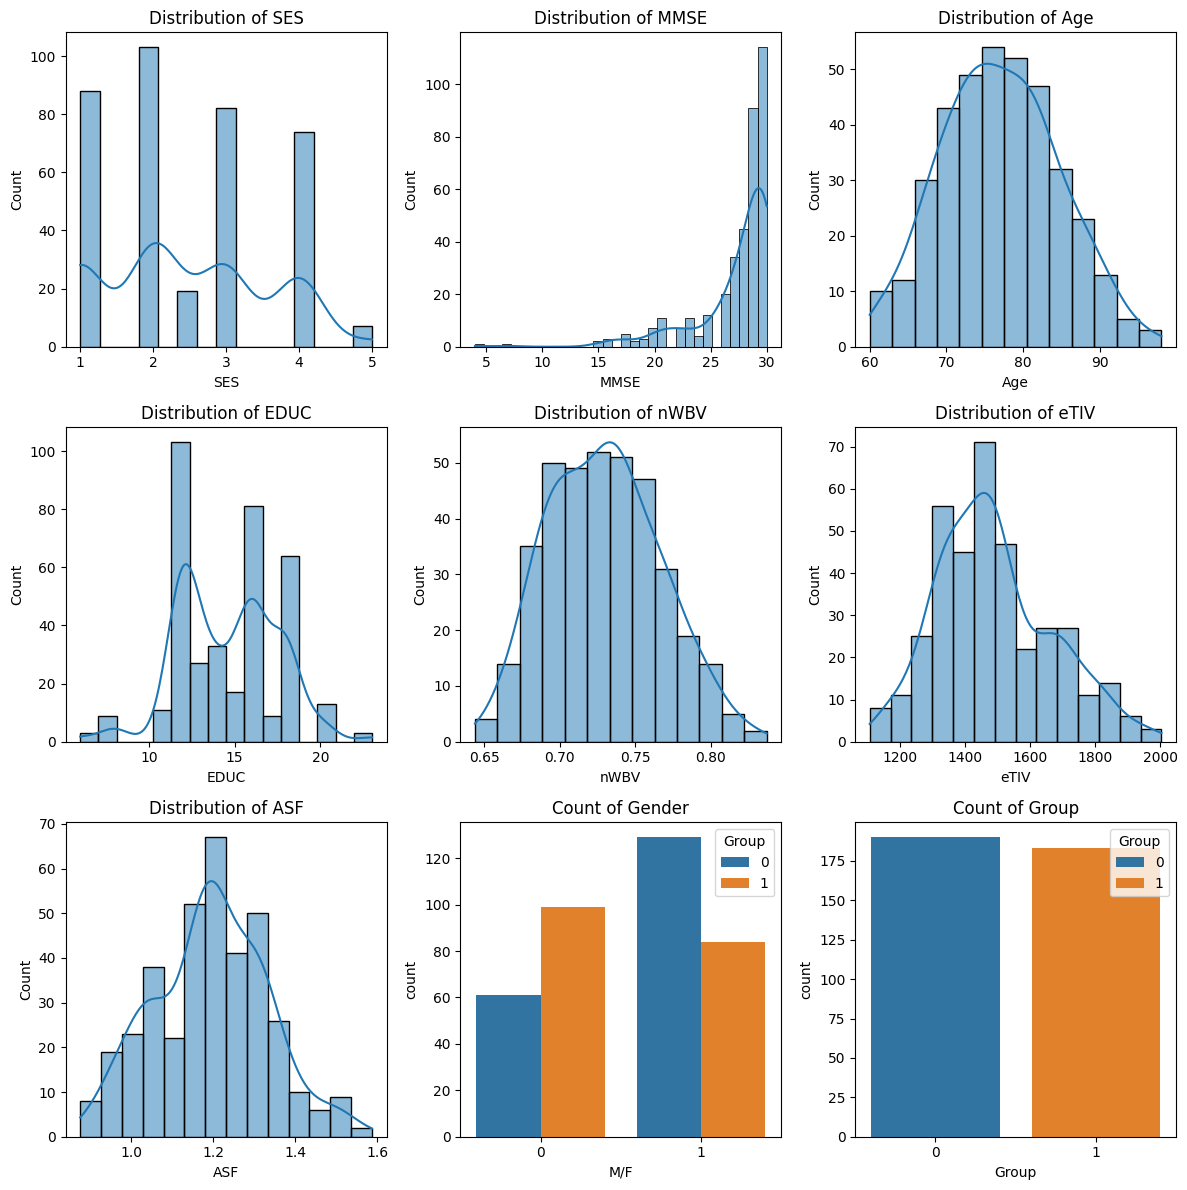

In [121]:
## Numeric Values
numeric_features = ['SES', 'MMSE', 'Age', 'EDUC', 'nWBV', 'eTIV', 'ASF']

plt.figure(figsize=(12, 12))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(dataframe[feature], kde=True)
    plt.title(f'Distribution of {feature}')

## Categorical Values

plt.subplot(3, 3, 8)
sns.countplot(data=dataframe, x=dataframe['M/F'], hue='Group')
plt.title(f'Count of Gender')

plt.subplot(3, 3, 9)
sns.countplot(data=dataframe, x=dataframe['Group'], hue='Group')
plt.title(f'Count of Group')

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Show plot
plt.show()


 ## Bivariate Analysis

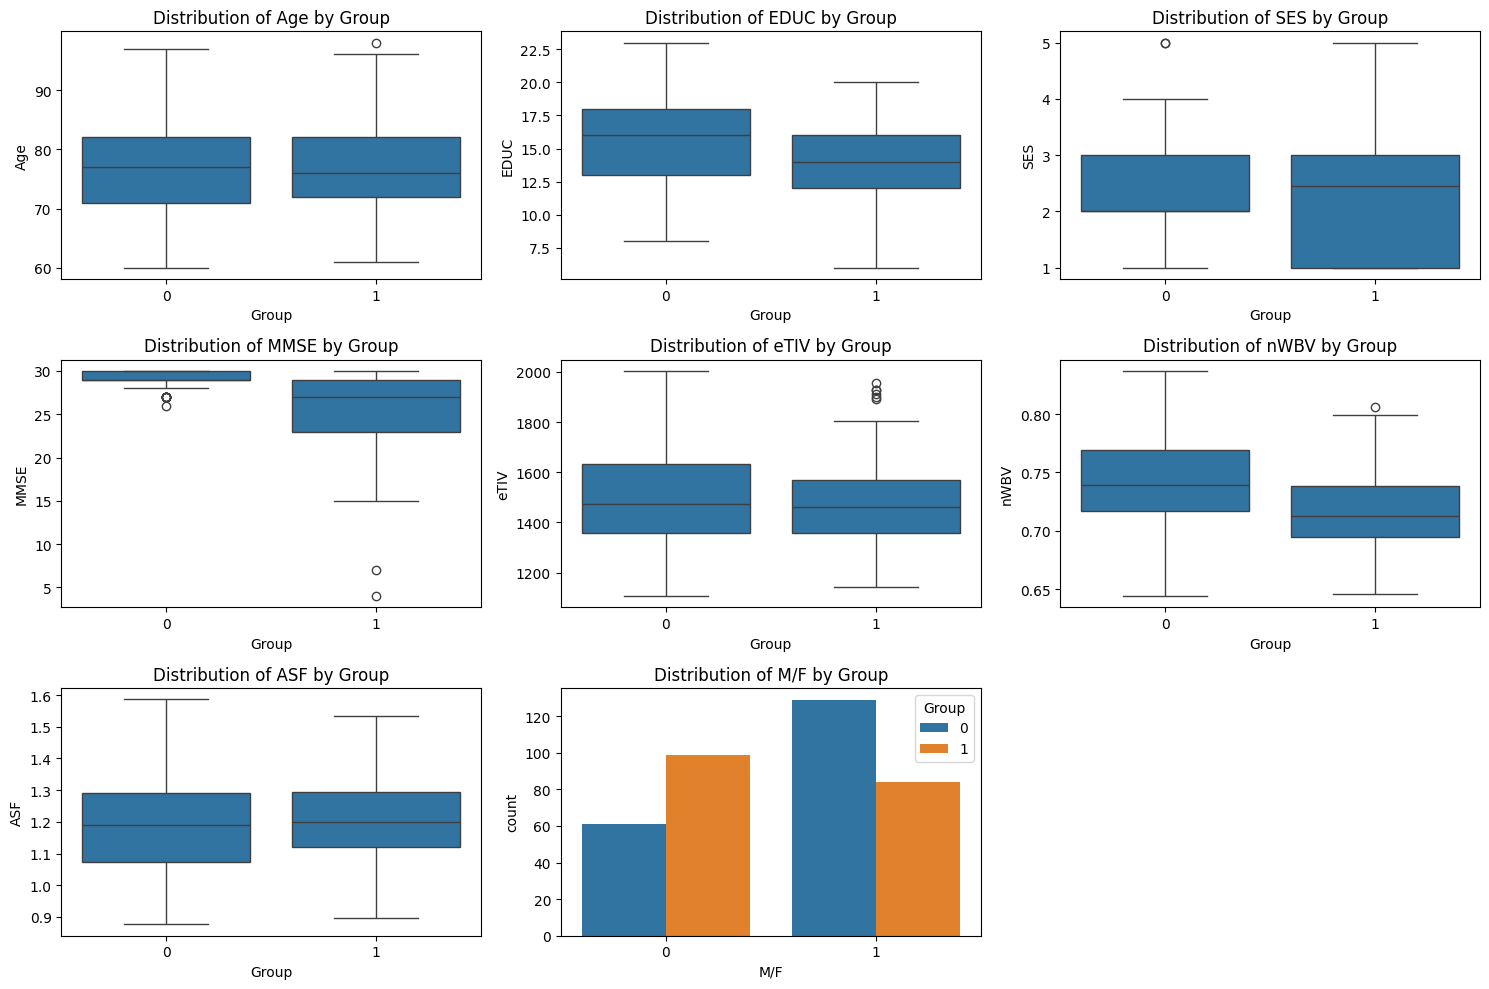

In [122]:
# Select numeric columns (excluding the 'group' column)
numeric_columns = ['Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']
plt.figure(figsize=(15, 10))

# Plot each numeric column against the 'group' column
for i, column in enumerate(numeric_columns,1):

    plt.subplot(3, 3, i)
    sns.boxplot(x='Group', y=column, data=dataframe)
    plt.title(f'Distribution of {column} by Group')
    plt.xlabel('Group')
    plt.ylabel(column)


plt.subplot(3, 3, 8)
sns.countplot(x=dataframe['M/F'], hue='Group', data=dataframe)
plt.title(f'Distribution of M/F by Group')
plt.legend(title='Group')

plt.tight_layout()
plt.show()




# Removing CDR attribute

In [123]:
dataframe = dataframe.drop(columns=['CDR'])

# Feature Selection

### Applying mRMR technique

In [124]:
# Exclude both 'Group' and 'Age_Group' columns
mrmr_data = dataframe.drop(columns=['Group'])

# Convert categorical variables to dummy variables
mrmr_data = pd.get_dummies(mrmr_data)

# Encode the target variable
mrmr_target = dataframe['Group'].astype('category').cat.codes

# Perform mRMR feature selection
mrmr_selected_features = mrmr_classif(X=mrmr_data, y=mrmr_target, K=5)

print("Selected features:", mrmr_selected_features)


100%|██████████| 5/5 [00:00<00:00, 27.35it/s]

Selected features: ['MMSE', 'nWBV', 'EDUC', 'M/F', 'SES']


As shown the mRMR (minimum Redundancy Maximum Relevance) teqhuniqe chose the following columns: MMSE, nWBV, EDUC, M/F, and SES.

We will apply Correlation Coefficient to further assess the result.

### Applying Correlation Coefficient

In [125]:
# Find the pearson correlations matrix
corr = dataframe.corr(method = 'pearson')

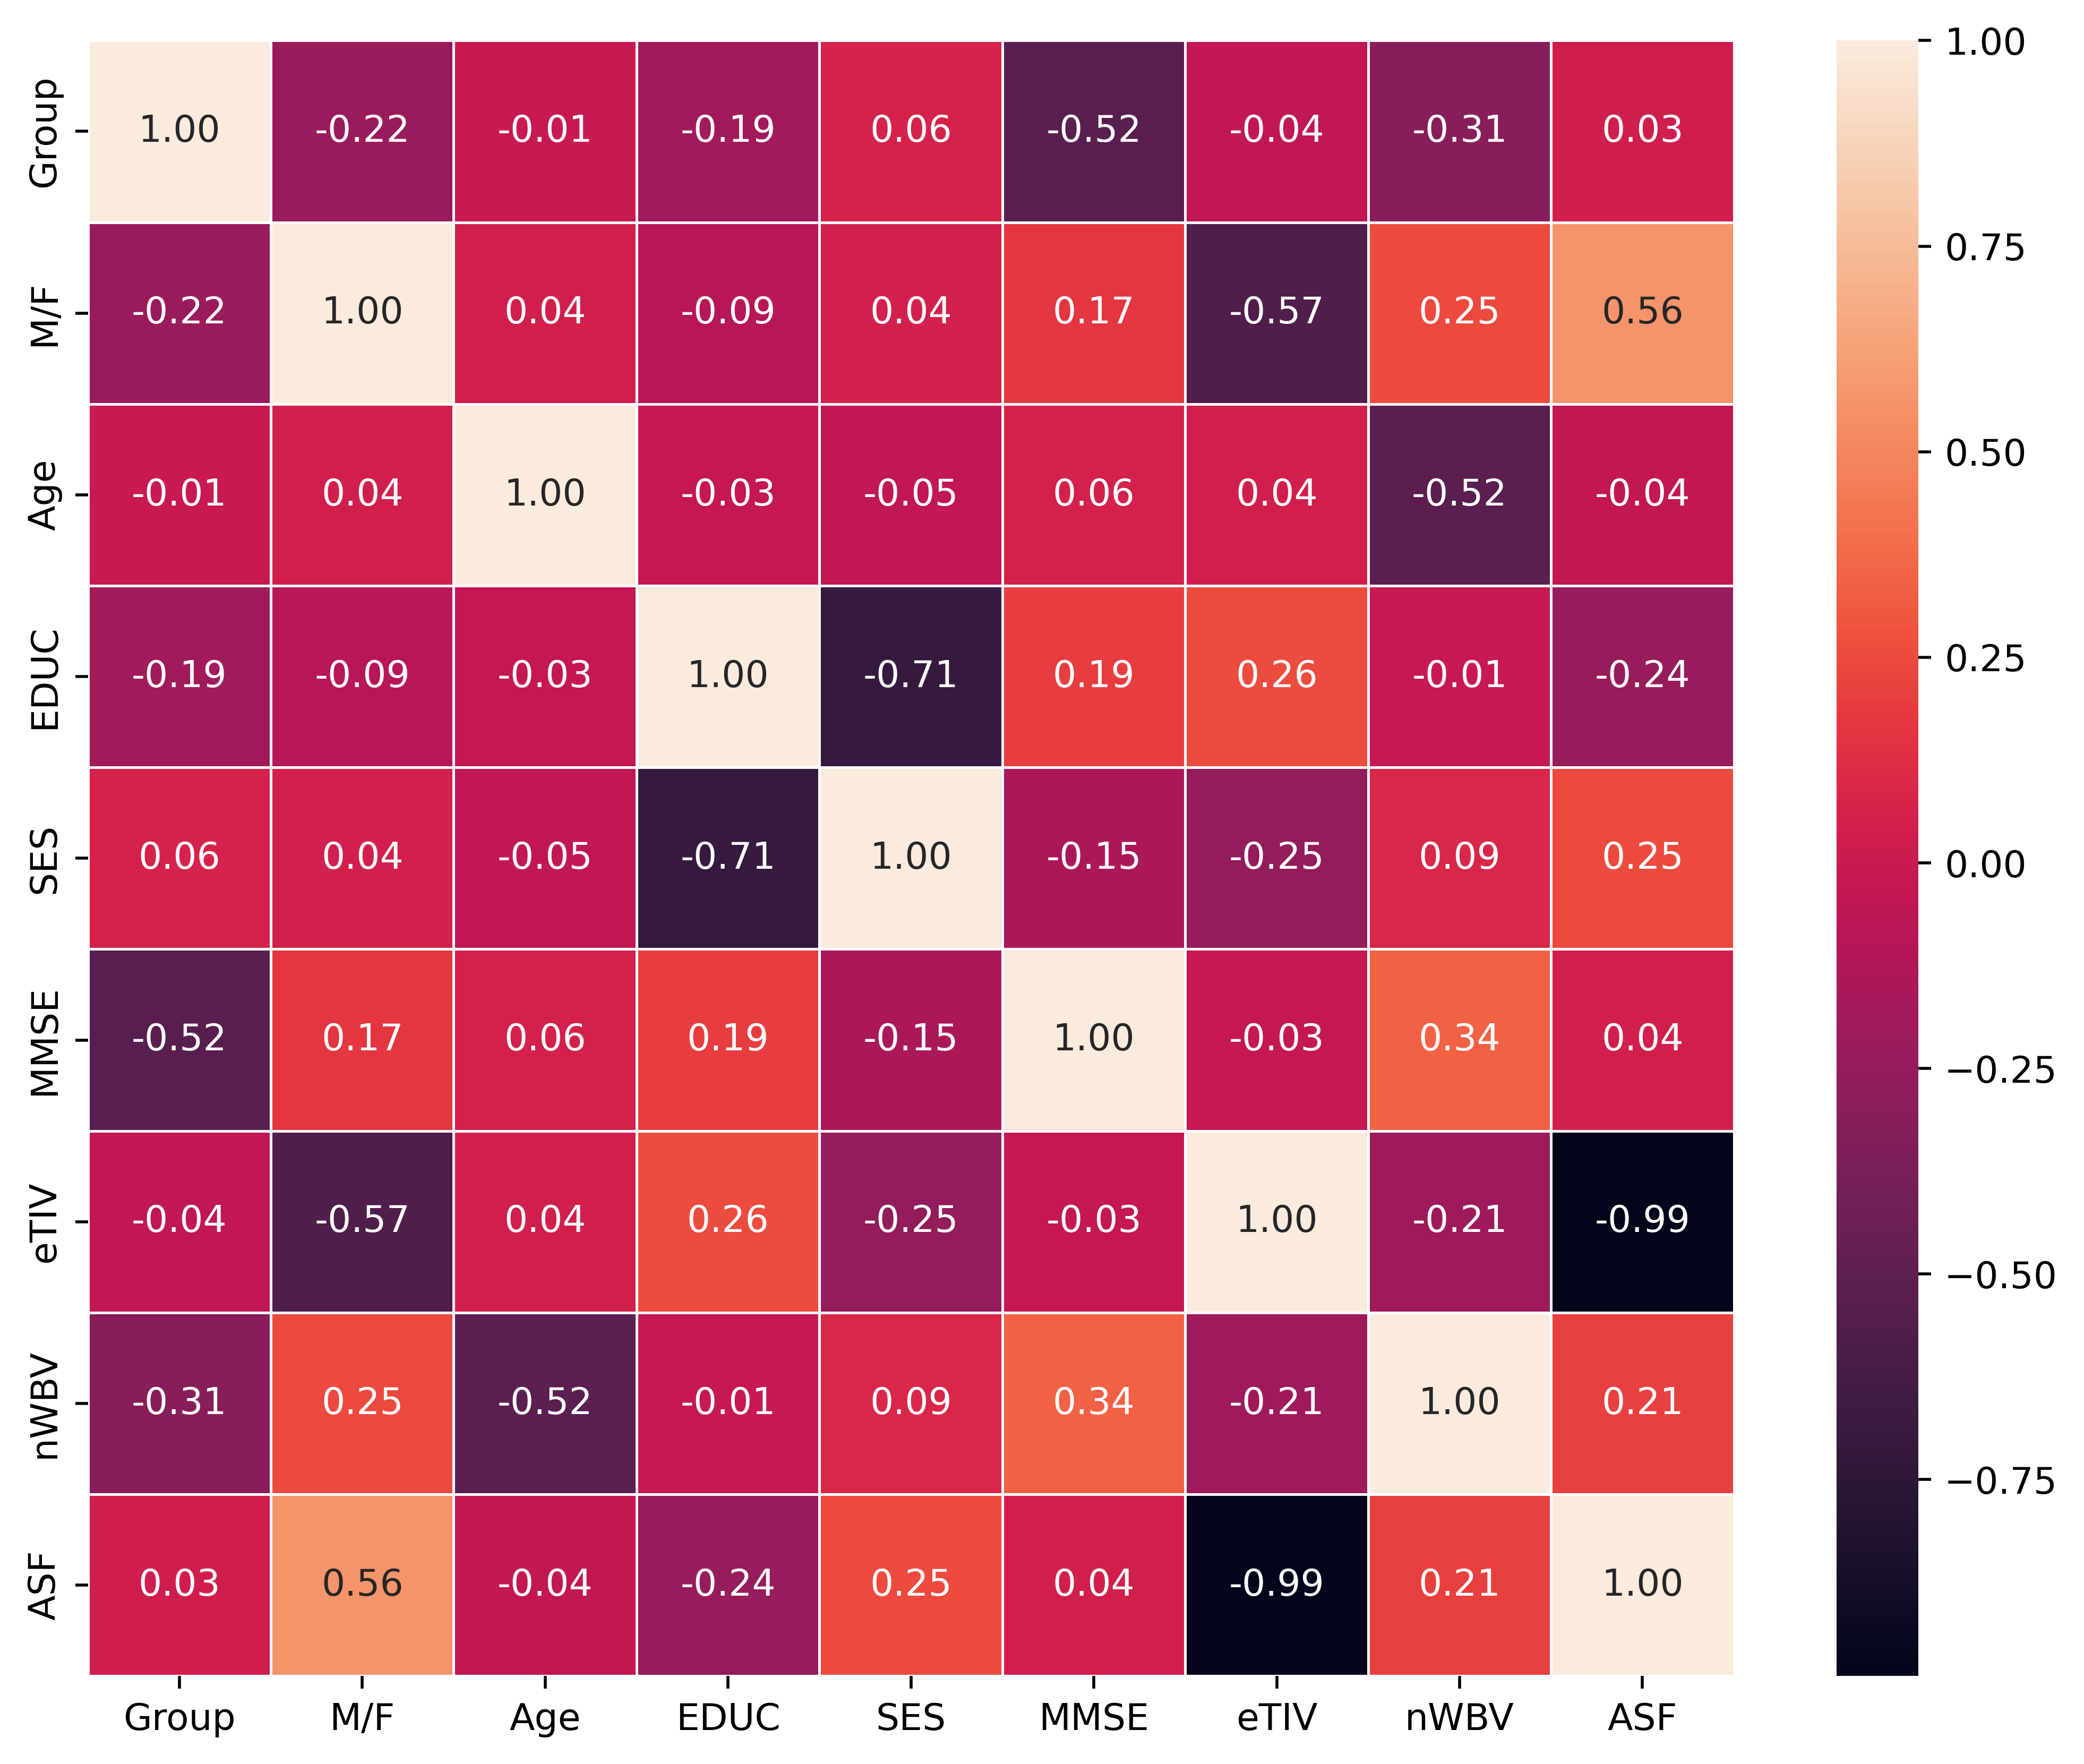

In [126]:
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

the map futrher affirms the results of the mRMR teqhuniqe, therefore, we will remove the irrelevant features.

### Applying Mutual Information

In [127]:
# Drop the target column 'Group' from the features
X = dataframe.drop(labels=['Group'], axis=1)

# Convert any categorical variables into numerical format
X = pd.get_dummies(X)

# Extract the target variable
y = dataframe['Group']

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)

# Compute mutual information between each feature and the target variable
mutual_info = mutual_info_classif(X_train, y_train)

mutual_info

array([0.02749871, 0.        , 0.07816898, 0.0908063 , 0.24050235,
       0.06993663, 0.03829599, 0.06091375])

In [128]:
# Convert mutual_info array to a pandas Series
mutual_info_series = pd.Series(mutual_info, index=X_train.columns)

# Sort the mutual information scores in descending order
mutual_info_sorted = mutual_info_series.sort_values(ascending=False)

# Print the sorted mutual information scores
print("Sorted mutual information scores:\n", mutual_info_sorted)

Sorted mutual information scores:
 MMSE    0.240502
SES     0.090806
EDUC    0.078169
eTIV    0.069937
ASF     0.060914
nWBV    0.038296
M/F     0.027499
Age     0.000000
dtype: float64


<Axes: >

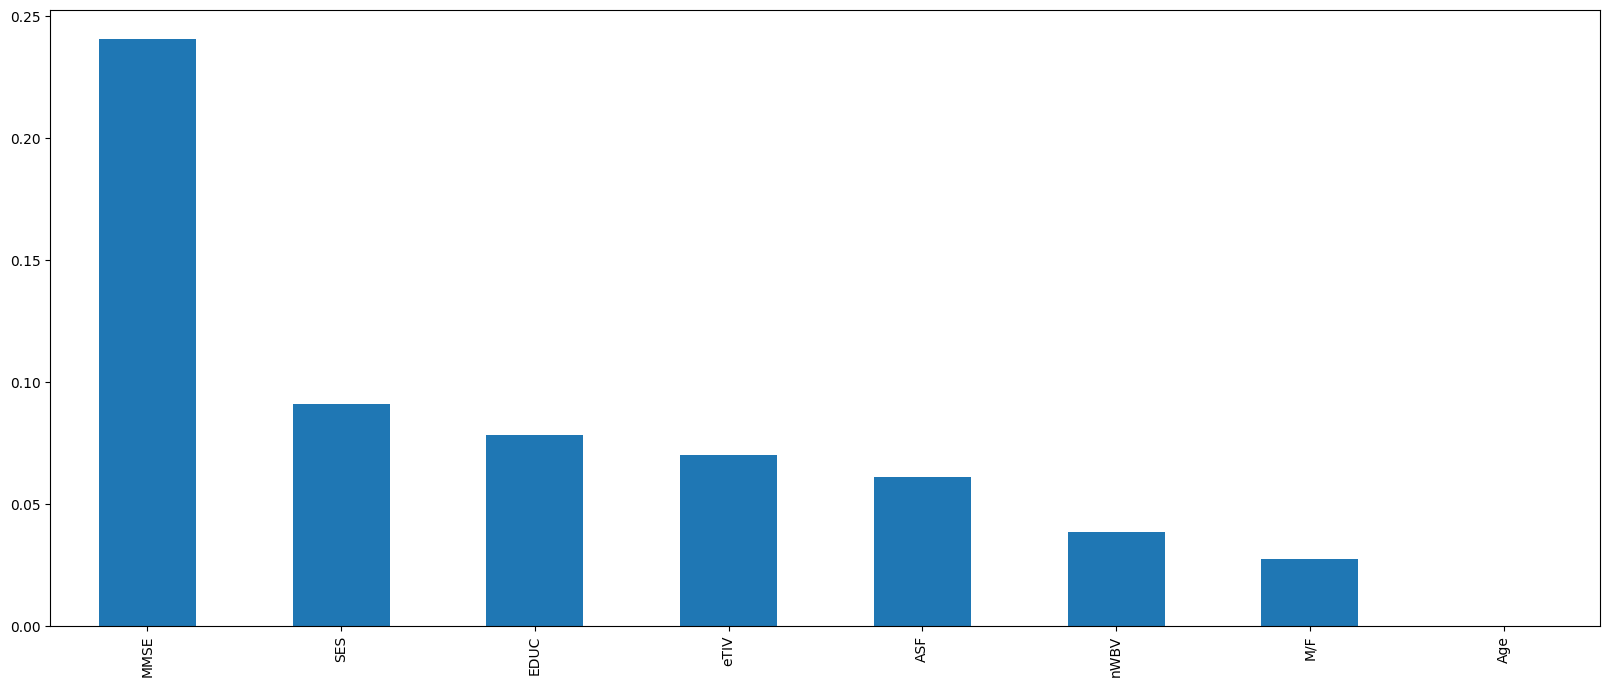

In [129]:
mutual_info_series.sort_values(ascending=False).plot.bar(figsize=(20, 8))

As shown the information gain teqhuniqe suggests the following columns (in descending order): MMSE, nWBV, eTIV, ASF, EDUC, Age, M/F, SES.

we will choose the top 5 columns which are: MMSE, nWBV, eTIV, ASF, EDUC.


# Removing Irrelevant Features

# mRMR Technique

In [130]:
mrmr_dataframe_selected_features = dataframe[['Group'] + mrmr_selected_features ]
mrmr_dataframe_selected_features.head()

,Group,MMSE,nWBV,EDUC,M/F,SES
0,0,27.0,0.696,14,0,2.000000
1,0,30.0,0.681,14,0,2.000000
2,1,23.0,0.736,12,0,2.460452
3,1,28.0,0.713,12,0,2.460452
4,1,22.0,0.701,12,0,2.460452


# Mutual Information Technique

In [131]:
infog_dataframe_selected_features = dataframe[['Group'] + ['MMSE'] + ['EDUC'] + ['nWBV'] + ['eTIV'] + ['ASF']]
infog_dataframe_selected_features.head()

,Group,MMSE,EDUC,nWBV,eTIV,ASF
0,0,27.0,14,0.696,1987,0.883
1,0,30.0,14,0.681,2004,0.876
2,1,23.0,12,0.736,1678,1.046
3,1,28.0,12,0.713,1738,1.010
4,1,22.0,12,0.701,1698,1.034


# Machine Learning Model

## SVM

### SVM - All Features

In [132]:
# Split dataset into training set and test set
svmXall_train, svmXall_test, svmyall_train, svmyall_test = train_test_split(dataframe.drop(columns=['Group']), dataframe['Group'], test_size=0.3,random_state=109) # 70% training and 30% test

In [133]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(svmXall_train, svmyall_train)

#Predict the response for test dataset
svmyall_pred = clf.predict(svmXall_test)

In [134]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(svmyall_test, svmyall_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(svmyall_test, svmyall_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(svmyall_test, svmyall_pred))

Accuracy: 0.8214285714285714
Precision: 0.8888888888888888
Recall: 0.7272727272727273


### SVM - mRMR

In [135]:
# Split dataset into training set and test set
svmXmrmr_train, svmXmrmr_test, svmymrmr_train, svmymrmr_test = train_test_split(mrmr_dataframe_selected_features.drop(columns=['Group']), mrmr_dataframe_selected_features['Group'], test_size=0.3,random_state=109) # 70% training and 30% test

In [136]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(svmXmrmr_train, svmymrmr_train)

#Predict the response for test dataset
svmymrmr_pred = clf.predict(svmXmrmr_test)

In [137]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(svmymrmr_test, svmymrmr_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(svmymrmr_test, svmymrmr_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(svmymrmr_test, svmymrmr_pred))

Accuracy: 0.8125
Precision: 0.8695652173913043
Recall: 0.7272727272727273


### SVM - Mutual Information

In [138]:
# Split dataset into training set and test set
svmXig_train, svmXig_test, svmyig_train, svmyig_test = train_test_split(infog_dataframe_selected_features.drop(columns=['Group']), infog_dataframe_selected_features['Group'], test_size=0.3,random_state=109) # 70% training and 30% test

In [139]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(svmXig_train, svmyig_train)

#Predict the response for test dataset
svmyig_pred = clf.predict(svmXig_test)

In [140]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(svmyig_test, svmyig_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(svmyig_test, svmyig_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(svmyig_test, svmyig_pred))

Accuracy: 0.8125
Precision: 0.9473684210526315
Recall: 0.6545454545454545


## Logistic Regression

### Logistic Regression - All Features

In [141]:
# Split dataset into training set and test set
lrXall_train, lrXall_test, lryall_train, lryall_test = train_test_split(dataframe.drop(columns=['Group']), dataframe['Group'], test_size=0.3, random_state=109) # 70% training and 30% test

# Create a Logistic Regression Classifier
clf = LogisticRegression()

# Train the model using the training sets
clf.fit(lrXall_train, lryall_train)

# Predict the response for test dataset
lryall_pred = clf.predict(lrXall_test)

# Model evaluation
print("Accuracy:", metrics.accuracy_score(lryall_test, lryall_pred))
print("Precision:", metrics.precision_score(lryall_test, lryall_pred))
print("Recall:", metrics.recall_score(lryall_test, lryall_pred))

Accuracy: 0.8125
Precision: 0.8695652173913043
Recall: 0.7272727272727273


### Logistic Regression - mRMR

In [142]:

# Split dataset into training set and test set
lrXmrmr_train, lrXmrmr_test, lrymrmr_train, lrymrmr_test = train_test_split(mrmr_dataframe_selected_features.drop(columns=['Group']), mrmr_dataframe_selected_features['Group'], test_size=0.3, random_state=109) # 70% training and 30% test

# Create a Logistic Regression Classifier
clf = LogisticRegression()

# Train the model using the training sets
clf.fit(lrXmrmr_train, lrymrmr_train)

# Predict the response for test dataset
lrymrmr_pred = clf.predict(lrXmrmr_test)

# Model Evaluation
print("Accuracy:",metrics.accuracy_score(lrymrmr_test, lrymrmr_pred))
print("Precision:",metrics.precision_score(lrymrmr_test, lrymrmr_pred))
print("Recall:",metrics.recall_score(lrymrmr_test, lrymrmr_pred))

Accuracy: 0.8035714285714286
Precision: 0.8666666666666667
Recall: 0.7090909090909091


### Logistic Regression - Mutual Information

In [143]:

# Split dataset into training set and test set
lrXig_train, lrXig_test, lryig_train, lryig_test = train_test_split(infog_dataframe_selected_features.drop(columns=['Group']), infog_dataframe_selected_features['Group'], test_size=0.3, random_state=109) # 70% training and 30% test

# Create a Logistic Regression Classifier
clf = LogisticRegression()

# Train the model using the training sets
clf.fit(lrXig_train, lryig_train)

# Predict the response for test dataset
lryig_pred = clf.predict(lrXig_test)

# Model evaluation
print("Accuracy:",metrics.accuracy_score(lryig_test, lryig_pred))
print("Precision:",metrics.precision_score(lryig_test, lryig_pred))
print("Recall:",metrics.recall_score(lryig_test, lryig_pred))

Accuracy: 0.8303571428571429
Precision: 0.9285714285714286
Recall: 0.7090909090909091


### Cross-Validation

In [144]:
# Define a parameter grid for n_estimators
param_grid = {'n_estimators': [50, 100, 150, 200]}

# Model 1
# Split dataset into training set and test set
lrXall_train, lrXall_test, lryall_train, lryall_test = train_test_split(dataframe.drop(columns=['Group']), dataframe['Group'], test_size=0.3, random_state=109) # 70% training and 30% test
base_clf = LogisticRegression()
boosted_clf = AdaBoostClassifier(base_clf, random_state=109)
grid_search_1 = GridSearchCV(boosted_clf, param_grid, cv=5, scoring='accuracy')
grid_search_1.fit(lrXall_train, lryall_train)
print("Best n_estimators for Model 1:", grid_search_1.best_params_)

# Model 2
# Split dataset into training set and test set
lrXig_train, lrXig_test, lryig_train, lryig_test = train_test_split(infog_dataframe_selected_features.drop(columns=['Group']), infog_dataframe_selected_features['Group'], test_size=0.3, random_state=109) # 70% training and 30% test
base_clf = LogisticRegression()
boosted_clf = AdaBoostClassifier(base_clf, random_state=109)
grid_search_2 = GridSearchCV(boosted_clf, param_grid, cv=5, scoring='accuracy')
grid_search_2.fit(lrXig_train, lryig_train)
print("Best n_estimators for Model 2:", grid_search_2.best_params_)

# Model 3
# Split dataset into training set and test set
lrXmrmr_train, lrXmrmr_test, lrymrmr_train, lrymrmr_test = train_test_split(mrmr_dataframe_selected_features.drop(columns=['Group']), mrmr_dataframe_selected_features['Group'], test_size=0.3, random_state=109) # 70% training and 30% test
base_clf = LogisticRegression()
boosted_clf = AdaBoostClassifier(base_clf, random_state=109)
grid_search_3 = GridSearchCV(boosted_clf, param_grid, cv=5, scoring='accuracy')
grid_search_3.fit(lrXmrmr_train, lrymrmr_train)
print("Best n_estimators for Model 3:", grid_search_3.best_params_)

Best n_estimators for Model 1: {'n_estimators': 200}
Best n_estimators for Model 2: {'n_estimators': 50}
Best n_estimators for Model 3: {'n_estimators': 50}


## Boosted Logistic Regression

### Boosted Logistic Regression - All Features

In [145]:
# Split dataset into training set and test set
lrXall_train, lrXall_test, lryall_train, lryall_test = train_test_split(dataframe.drop(columns=['Group']), dataframe['Group'], test_size=0.3, random_state=109) # 70% training and 30% test

# Create a Logistic Regression Classifier
base_clf = LogisticRegression()

# Create an AdaBoost classifier with logistic regression as base estimator
boosted_clf = AdaBoostClassifier(base_clf, n_estimators=50, random_state=109)

# Train the boosted model using the training sets
boosted_clf.fit(lrXall_train, lryall_train)

# Predict the response for test dataset using the boosted model
lryall_pred_boosted = boosted_clf.predict(lrXall_test)

# Model evaluation
print("Accuracy (boosted):", metrics.accuracy_score(lryall_test, lryall_pred_boosted))
print("Precision (boosted):", metrics.precision_score(lryall_test, lryall_pred_boosted))
print("Recall (boosted):", metrics.recall_score(lryall_test, lryall_pred_boosted))

Accuracy (boosted): 0.8303571428571429
Precision (boosted): 0.875
Recall (boosted): 0.7636363636363637


### Boosted Logistic Regression - mRMR

In [146]:
# Split dataset into training set and test set
lrXmrmr_train, lrXmrmr_test, lrymrmr_train, lrymrmr_test = train_test_split(mrmr_dataframe_selected_features.drop(columns=['Group']), mrmr_dataframe_selected_features['Group'], test_size=0.3, random_state=109) # 70% training and 30% test

# Create a Logistic Regression Classifier
base_clf = LogisticRegression()

# Create an AdaBoost classifier with logistic regression as base estimator
boosted_clf = AdaBoostClassifier(base_clf, n_estimators=50, random_state=109)

# Train the boosted model using the training sets
boosted_clf.fit(lrXmrmr_train, lrymrmr_train)

# Predict the response for test dataset using the boosted model
lrymrmr_pred_boosted = boosted_clf.predict(lrXmrmr_test)

# Model Evaluation
print("Accuracy (boosted):", metrics.accuracy_score(lrymrmr_test, lrymrmr_pred_boosted))
print("Precision (boosted):", metrics.precision_score(lrymrmr_test, lrymrmr_pred_boosted))
print("Recall (boosted):", metrics.recall_score(lrymrmr_test, lrymrmr_pred_boosted))


Accuracy (boosted): 0.8303571428571429
Precision (boosted): 0.875
Recall (boosted): 0.7636363636363637


### Boosted Logistic Regression - Mutual Information

In [147]:
# Split dataset into training set and test set
lrXig_train, lrXig_test, lryig_train, lryig_test = train_test_split(infog_dataframe_selected_features.drop(columns=['Group']), infog_dataframe_selected_features['Group'], test_size=0.3, random_state=109) # 70% training and 30% test

# Create a Logistic Regression Classifier
base_clf = LogisticRegression()

# Create an AdaBoost classifier with logistic regression as base estimator
boosted_clf = AdaBoostClassifier(base_clf, n_estimators=50, random_state=109)

# Train the boosted model using the training sets
boosted_clf.fit(lrXig_train, lryig_train)

# Predict the response for test dataset using the boosted model
lryig_pred_boosted = boosted_clf.predict(lrXig_test)

# Model Evaluation
print("Accuracy (boosted):", metrics.accuracy_score(lryig_test, lryig_pred_boosted))
print("Precision (boosted):", metrics.precision_score(lryig_test, lryig_pred_boosted))
print("Recall (boosted):", metrics.recall_score(lryig_test, lryig_pred_boosted))

Accuracy (boosted): 0.8214285714285714
Precision (boosted): 0.8571428571428571
Recall (boosted): 0.7636363636363637


## Random Forest

### Cross-Validation

In [148]:
# Define a parameter grid for n_estimators
param_grid = {'n_estimators': [50, 100, 150, 200]}  # Adjust the values as needed

# Model 1
# Split dataset into training set and test set
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.3, random_state=109)
clf_1 = RandomForestClassifier(random_state=109)
grid_search_1 = GridSearchCV(clf_1, param_grid, cv=5, scoring='accuracy')
grid_search_1.fit(X_train_1, y_train_1)
print("Best n_estimators for Model 1:", grid_search_1.best_params_)

# Model 2
# Split dataset into training set and test set
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(mrmr_dataframe_selected_features.drop(columns=['Group']), mrmr_dataframe_selected_features['Group'], test_size=0.3, random_state=109)
clf_2 = RandomForestClassifier(random_state=109)
grid_search_2 = GridSearchCV(clf_2, param_grid, cv=5, scoring='accuracy')
grid_search_2.fit(X_train_2, y_train_2)
print("Best n_estimators for Model 2:", grid_search_2.best_params_)

# Model 3
# Split dataset into training set and test set
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(infog_dataframe_selected_features.drop(columns=['Group']), infog_dataframe_selected_features['Group'], test_size=0.3, random_state=109)
clf_3 = RandomForestClassifier(random_state=109)
grid_search_3 = GridSearchCV(clf_3, param_grid, cv=5, scoring='accuracy')
grid_search_3.fit(X_train_3, y_train_3)
print("Best n_estimators for Model 3:", grid_search_3.best_params_)

Best n_estimators for Model 1: {'n_estimators': 50}
Best n_estimators for Model 2: {'n_estimators': 200}
Best n_estimators for Model 3: {'n_estimators': 150}


### Random Forest - All Features

In [149]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)

# Initialize Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=150, random_state=109)

# Train the classifier
random_forest.fit(X_train, y_train)

# Make predictions
predictions = random_forest.predict(X_test)

# Model Evalution
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
precision = precision_score(y_test, predictions, average='weighted')
print("Precision:", precision)
recall = recall_score(y_test, predictions, average='weighted')
print("Recall:", recall)

Accuracy: 0.8482142857142857
Precision: 0.8570546301524562
Recall: 0.8482142857142857


### Random Forest - mRMR

In [150]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(mrmr_dataframe_selected_features.drop(columns=['Group']), mrmr_dataframe_selected_features['Group'], test_size=0.3, random_state=109) # 70% training and 30% test

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=150, random_state=109)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

Accuracy: 0.7857142857142857
Precision: 0.7886297376093294
Recall: 0.7857142857142857


### Random Forest - Mutual Information

In [151]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(infog_dataframe_selected_features.drop(columns=['Group']), infog_dataframe_selected_features['Group'], test_size=0.3, random_state=109) # 70% training and 30% test

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=109)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))


Accuracy: 0.8214285714285714
Precision: 0.8276946457797523
Recall: 0.8214285714285714


## Boosted Random Forest

### Boosted Random Forest - All Features

In [152]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)

# Initialize Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=150, random_state=109)

# Initialize AdaBoost Classifier with Random Forest as base estimator
adaboost = AdaBoostClassifier(random_forest, n_estimators=150, random_state=109)

# Train the AdaBoost classifier
adaboost.fit(X_train, y_train)

joblib.dump(adaboost, 'model.pkl')
# Make predictions
predictions = adaboost.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')

print("AdaBoost Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

AdaBoost Performance:
Accuracy: 0.875
Precision: 0.8767679202828672
Recall: 0.875


### Boosted Random Forest - mRMR

In [153]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(mrmr_dataframe_selected_features.drop(columns=['Group']), mrmr_dataframe_selected_features['Group'], test_size=0.3, random_state=109)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=150, random_state=109)

# Initialize AdaBoost Classifier with Random Forest as base estimator
adaboost = AdaBoostClassifier(clf, n_estimators=150, random_state=109)

# Train the AdaBoost classifier
adaboost.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = adaboost.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("AdaBoost Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

AdaBoost Performance:
Accuracy: 0.7678571428571429
Precision: 0.7680513043081
Recall: 0.7678571428571429


### Boosted Random Forest - Mutual Information

In [154]:
## Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(infog_dataframe_selected_features.drop(columns=['Group']), infog_dataframe_selected_features['Group'], test_size=0.3, random_state=109)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=109)

# Initialize AdaBoost Classifier with Random Forest as base estimator
adaboost = AdaBoostClassifier(clf, n_estimators=100, random_state=109)

# Train the AdaBoost classifier
adaboost.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = adaboost.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("AdaBoost Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


AdaBoost Performance:
Accuracy: 0.8214285714285714
Precision: 0.8314972755271263
Recall: 0.8214285714285714


In [155]:
import sklearn
print(sklearn.__version__)

1.4.1.post1
